<a href="https://colab.research.google.com/github/Nydhal/Python-Notebooks/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


We import libraries and data.

(60000, 28, 28)
(10000, 28, 28)
0


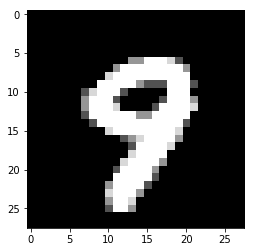

In [3]:
print(x_train.shape)
print(x_test.shape)
x_or_y = 0
sample_number,pixel_row,pixel_col = 5999,27,27
print((x_train, y_train)[x_or_y][sample_number][pixel_row][pixel_col])
plt.imshow(x_train[5999], cmap='Greys_r')

[  0   0   0   0   0   0   0   0   0   0  95 253 252 252 252 252 253 252
 252 252 252 245  80   0   0   0   0   0]
35.108418367346935


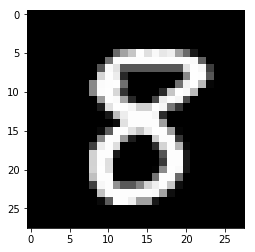

In [4]:

sample_number,pixel_row,pixel_col = 333,6,0
print((x_train, y_train)[x_or_y][sample_number][pixel_row])
plt.imshow(x_train[333], cmap='Greys_r')
print(x_train[0].mean())

We check the shape of the data and look at some values and check the mean function.


In [5]:
mean_train = x_train.mean(axis=(1,2))
mean_train.shape

(60000,)

Calculate the mean for the train set. and check the shape (1d array 6000 values)



In [6]:
var_train = x_train.var(axis=2).mean(axis=1)
var_train.shape

(60000,)

Do the same with average of the row variance.

In [7]:
mean_test = x_test.mean(axis=(1,2))
mean_test.shape
var_test = x_test.var(axis=2).mean(axis=1)
var_test.shape

(10000,)

Do above steps for the test set.

Below we plot the data points for the train and trest set respectively for all character values (0 to 9)

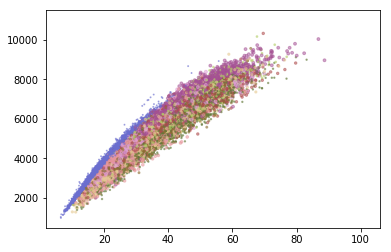

In [8]:
plt.scatter(mean_train,var_train,c=y_train,s=y_train,alpha=0.5,cmap='tab20b')

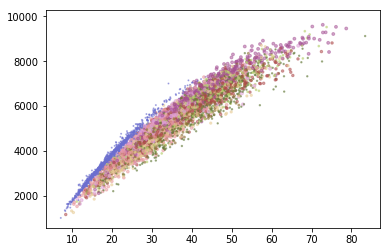

In [9]:
plt.scatter(mean_test,var_test,c=y_test,s=y_test,alpha=0.5,cmap='tab20b')

In the next lines, we train a naive bayes gaussian classifier which will estimate the densities of 10 gaussian deistribution of equal priors (by default).
We then print our accuracy (~ 0.23)

In [10]:
train_data = np.array(list(zip(mean_train,var_train)))
test_data = np.array(list(zip(mean_test,var_test)))

gauss = GaussianNB()
gauss.fit(train_data, y_train)
y_pred = gauss.predict(test_data)

print("Estimated means:\n", gauss.theta_)
print("Estimated variance:\n",gauss.sigma_)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Estimated means:
 [[  44.21682791 6557.52623103]
 [  19.37965385 3658.69405412]
 [  37.98865785 5436.67061152]
 [  36.09018654 5495.83419115]
 [  30.94822568 4731.81271011]
 [  32.83109548 4905.0399444 ]
 [  35.01195268 5323.64119696]
 [  29.20456293 4541.76345245]
 [  38.28977538 5957.8147067 ]
 [  31.26043543 4944.38279147]]
Estimated variance:
 [[1.15267732e+02 1.57403173e+06]
 [3.14488031e+01 1.04009947e+06]
 [9.41510458e+01 1.41374412e+06]
 [9.28515422e+01 1.49037173e+06]
 [6.61148469e+01 1.13076782e+06]
 [9.02919573e+01 1.59051314e+06]
 [9.10963776e+01 1.33313749e+06]
 [6.10177760e+01 1.10911887e+06]
 [9.70497503e+01 1.61342176e+06]
 [6.84493157e+01 1.23466877e+06]]
Accuracy: 0.2293


In this step we consider only the binary classification case (0 , 1).
We first filter all other classes (2 to 9) from the data using pandas dataframes.

In [0]:
train_01 = pd.DataFrame({'mean':mean_train,'var':var_train,'y':y_train})
train_01 = train_01[(train_01['y'] == 0) | (train_01['y'] == 1)]
test_01 = pd.DataFrame({'mean':mean_test,'var':var_test,'y':y_test})
test_01 = test_01[(test_01['y'] == 0) | (test_01['y'] == 1)]

We plot the training data (zero is blue, one is red).

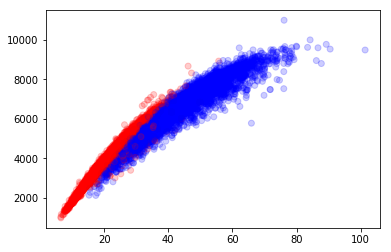

In [12]:
 plt.scatter(train_01['mean'],train_01['var'],c=train_01['y'],cmap='bwr',alpha=0.2)

We fit our Gaussian estimation again and print the accuracy.
Accuracy increases since we have less class overlap and better decision boundary.

In [13]:
gauss_01 = GaussianNB()
gauss_01.fit(train_01[['mean','var']], train_01['y'])
y_pred_01 = gauss.predict(test_01[['mean','var']])

print("Estimated means:\n", gauss_01.theta_)
print("Estimated variance:\n",gauss_01.sigma_)
print("Accuracy:",metrics.accuracy_score(test_01['y'], y_pred_01))

Estimated means:
 [[  44.21682791 6557.52623103]
 [  19.37965385 3658.69405412]]
Estimated variance:
 [[1.15269170e+02 1.57403174e+06]
 [3.14502416e+01 1.04009947e+06]]
Accuracy: 0.6836879432624113


Our accuracy is around 0.68
We plot the test values below.

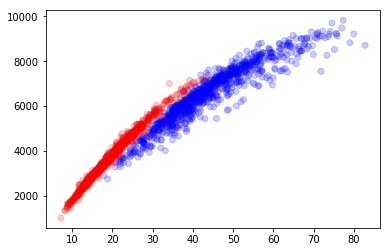

In [14]:
 plt.scatter(test_01['mean'],test_01['var'],c=test_01['y'],cmap='bwr',alpha=0.2)

# Project Part 2

In [0]:
# Preparing data to numpy
train = train_01.to_numpy()
test  = test_01.to_numpy()

# List of K neighbors 
k_list =[1, 3, 5, 7, 9, 11, 13, 15]

In [16]:
# Calculate NxM matrix of distances of N test points to M train points 
dist = []
for test_point in test.T[0:2].T:
    dist.append(np.hypot(*(train.T[0:2].T - test_point).T))

# Convert resulting list to numpy array
dist = np.array(dist)

# Print shape of the distance matrix
print(dist.shape)

(2115, 12665)


In [17]:
# For K = 1
k = 1
# Label predictions list
prediction = []


for i in range(len(dist)):
  prediction.append(\
                    float(\
                          # Get K closest points
                          np.take(train,\
                          # Get indices of smallest distance k elements 
                          np.argpartition(dist[i], k)[:k], axis=0)\
                          # Get Labels of K closest points
                          .T[2]\
                          # Calculate mean of the labels
                          .mean()\
                          # Convert to boolean (if the mean > 0.5 then #1 > #0)
                          > 0.5))

  
results = pd.DataFrame({'Label': test.T[2], 'Predict': prediction})

# Assign integer value 0,1 to correctness of prediction
results['Correct'] = np.where(results['Label']==results['Predict'], 1, 0)

# Mean of correct prediciotn is the accuracy
acc = results['Correct'].mean()

print('K: '+str(k)+'\tAccuracy: '+str(acc))  
results.describe()

K: 1	Accuracy: 0.9702127659574468


,Label,Predict,Correct
count,2115.000000,2115.000000,2115.000000
mean,0.536643,0.533333,0.970213
std,0.498773,0.499006,0.170040
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [0]:
#  Repeat Experiment for all K

accuracy_table = []
for k in k_list:
  prediction = []
  for i in range(len(dist)):
    prediction.append(float(np.take(train, np.argpartition(dist[i], k)[:k], axis=0).T[2].mean() > 0.5))

  KNN_results = pd.DataFrame({'True Label': test.T[2], 'Prediction': prediction})
  KNN_results['Correct'] = np.where(KNN_results['True Label']==KNN_results['Prediction'], 1, 0)

  acc = KNN_results['Correct'].mean()
  
  accuracy_table.append([k,acc])

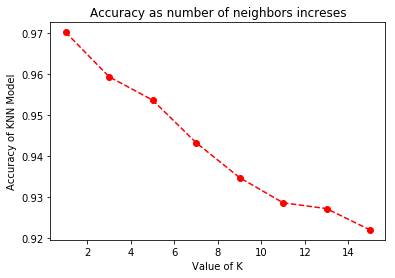

In [19]:
table = np.array(accuracy_table).T
plt.plot(table[0],table[1],'--ro')
plt.xlabel('Value of K')
plt.ylabel('Accuracy of KNN Model')
plt.title('Accuracy as number of neighbors increses')
plt.show()

#Project Part 3

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# dimensioins
img_rows = img_cols = 28

Using TensorFlow backend.


In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

###Baseline results


>  Test loss: 0.035095344878673676

>  Test accuracy: 0.9902


In [0]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Test loss: 0.04996691099215568
Test accuracy: 0.9865


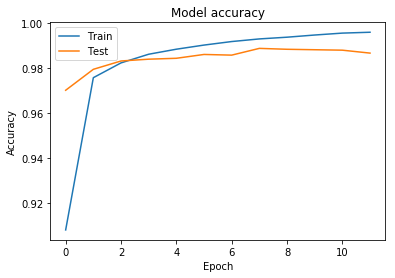

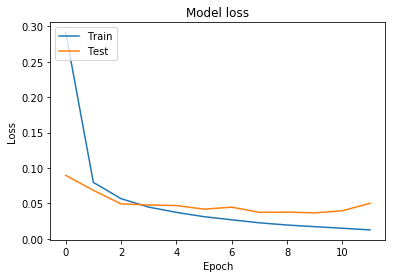

In [5]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Kernel size 5x5

>Test loss: 0.04996691099215568

>Test accuracy: 0.9865

In [6]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 196us/step


[0.04996691099215568, 0.9865]

Test loss: 0.054778690347645896
Test accuracy: 0.9827


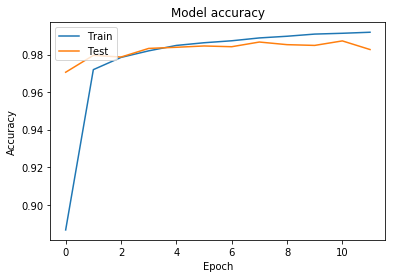

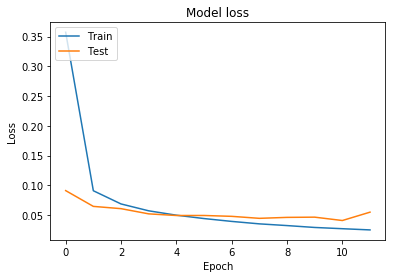

In [7]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(6, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Changed the number of feature maps from:

Conv Layer 1 = 6

Conv Layer 2 = 16

to

Conv Layer 1 = 6

Conv Layer 2 = 16

#Results

1% marginal decrease in accuracy.
0.1% increase in test loss.

>Test loss: 0.050 up to 0.055

>Test accuracy: 0.99 down to  0.98

